# Library Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# 데이터셋 구축

- 수능은 매년 데이터가 바뀌기에 내가 다루고자 하는 데이터가 바뀌어도 일관적으로 계속 정보를 처리하는 것을 목적으로 제작함.
- 따라서, 데이터 셋이 바뀌어도 문제가 없게 코드가 짜여지도록 목표를 잡고 프로젝트를 진행함.

In [7]:
num_students = 300 # 응시자 수

student_id = np.arange(1, num_students + 1)

korean = np.random.randint(0, 101, num_students)
math = np.random.randint(0, 101, num_students)
english = np.random.randint(0, 101, num_students)
history = np.random.randint(0, 51, num_students) # 한국사, 탐구 과목은 만점이 50점임을 감안
science1 = np.random.randint(0, 51, num_students)
science2 = np.random.randint(0, 51, num_students)

df = pd.DataFrame({'학생ID': student_id,'국어': korean,'수학': math,'영어': english,'한국사': history,'탐구1': science1,'탐구2': science2})

df.to_csv('student_scores.csv', index=False) #CSV파일로 저장

df.head()

,학생ID,국어,수학,영어,한국사,탐구1,탐구2
0,1,22,12,62,41,38,35
1,2,12,51,60,23,39,8
2,3,86,3,53,21,35,3
3,4,6,36,42,47,21,24
4,5,61,62,83,17,41,49


# 실행시간 구하기

In [8]:
def checktime(func):
    def newFunc(*args, **kwargs) :
      start = time.time()
      result = func(*args, **kwargs)
      end = time.time()
      print(f"\n실행시간은 : {end-start}\n")
    return newFunc

# 데이터 검사

In [9]:
class CheckingScores:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_data(self): # 데이터 경로가 알맞은지 확인
        try:
            self.data = pd.read_csv(self.file_path) 
        except Exception as e:
            print("데이터 로딩 중 오류 발생")

    def filter_korean_math_english(self): # 각 데이터들의 점수대가 알맞은 값을 가지고 있는지 확인
        try:
            self.data = self.data[(self.data['국어'].between(0, 100)) & (self.data['수학'].between(0, 100)) & (self.data['영어'].between(0, 100))]
        except Exception as e:
            print("국어, 수학, 영어 점수 처리 중 오류 발생")

    def filter_history_science1_science2(self): # 위와 동일하지만 만점이 달라서 따로 처리함
        try:
            self.data = self.data[(self.data['한국사'].between(0, 50)) & (self.data['탐구1'].between(0, 50)) & (self.data['탐구2'].between(0, 50))]
        except Exception as e:
            print("한국사, 탐구1, 탐구2 점수 처리 중 오류 발생")

    def process_scores(self):
        self.load_data()
        if self.data is not None:
            self.filter_korean_math_english()
            self.filter_history_science1_science2()
        return self.data

    def display_results(self):
        if self.data is not None:
            print(self.data.head())
        else:
            print("데이터 처리에 실패했습니다.")


processor = CheckingScores('student_scores.csv')
final_data = processor.process_scores()
processor.display_results()


   학생ID  국어  수학  영어  한국사  탐구1  탐구2
0     1  22  12  62   41   38   35
1     2  12  51  60   23   39    8
2     3  86   3  53   21   35    3
3     4   6  36  42   47   21   24
4     5  61  62  83   17   41   49


# 계산 클래스

In [10]:
class Calculate() :
    def __init__(self, data):
        self.data = data
        self.subjects = ['국어', '수학', '영어', '한국사', '탐구1', '탐구2']

    def get_student_scores(self, student_id): # 해당 학생의 점수 값을 불러오는 함수
        return self.data[self.data['학생ID'] == student_id].iloc[0]

    def number_of_students(self, subject): # 응시자 수를 반환하는 함수
        return len(self.data[subject])

    def calculate_standard_score(self, subject, score): # 표준 점수를 구하는 함수
        scores = self.data[subject]
        mean = sum(scores) / len(scores)
        variance = sum((x - mean) ** 2 for x in scores) / len(scores)
        std_dev = np.sqrt(variance)
        if subject in ['국어', '수학']: # 국어, 수학의 표준 점수
            standard_score = 20 * ((score - mean) / std_dev) + 100
        elif subject in ['탐구1', '탐구2']: # 탐구 과목의 표준 점수
            standard_score = 10 * ((score - mean) / std_dev) + 50
        else: # 영어와 한국사는 수능 성적표에서 표준 점수가 표시되지 않기에 예외처리 하였음
            return None
        return round(standard_score, 2)

    def calculate_percentile(self, subject, score): # 백분위를 구해주는 함수
        if subject in ['영어', '한국사']: # 영어와 한국사는 수능 성적표에서 백분위가 표시되지 않기에 예외처리 하였음
            return None

        scores = self.data[subject] # 나머지 과목들의 백분위 계산
        count = sum(1 for x in scores if x < score)
        percentile = (count / len(scores)) * 100
        return round(percentile, 2)

    def calculate_grade(self, subject, score): # 등급 산출 함수
      if subject == '영어': # 영어 과목은 다른 등급 산출 방식을 사용함 (절대 평가)
        if score >= 90:
            return 1
        elif score >= 80:
            return 2
        elif score >= 70:
            return 3
        elif score >= 60:
            return 4
        elif score >= 50:
            return 5
        elif score >= 40:
            return 6
        elif score >= 30:
            return 7
        elif score >= 20:
            return 8
        else:
            return 9

      elif subject == '한국사': # 한국사 과목은 다른 등급 산출 방식을 사용함 (절대 평가)
        if score >= 40:
            return 1
        elif score >= 35:
            return 2
        elif score >= 30:
            return 3
        elif score >= 25:
            return 4
        elif score >= 20:
            return 5
        elif score >= 15:
            return 6
        elif score >= 10:
            return 7
        elif score >= 5:
            return 8
        else:
            return 9

      else:
        percentile = self.calculate_percentile(subject, score) # 백분위를 토대로 나머지 과목들의 등급을 구함.
        if percentile is None:
            return None
        if percentile >= 96:
            return 1
        elif percentile >= 89:
            return 2
        elif percentile >= 77:
            return 3
        elif percentile >= 60:
            return 4
        elif percentile >= 40:
            return 5
        elif percentile >= 23:
            return 6
        elif percentile >= 11:
            return 7
        elif percentile >= 4:
            return 8
        else:
            return 9


    def get_student_results(self, student_id): # 원하는 학생의 성적을 구하는 함수.
        student_scores = self.get_student_scores(student_id)
        results = {}
        for subject in self.subjects:
            score = student_scores[subject]
            result = {'응시자수': self.number_of_students(subject),'등급': self.calculate_grade(subject, score)}

            if subject not in ['영어', '한국사']:
                result['표준점수'] = self.calculate_standard_score(subject, score)
                result['백분위'] = self.calculate_percentile(subject, score)
            results[subject] = result
        return results


# 각 학생들의 성적표 발급

In [13]:
@checktime # 실행시간 계산
def main() :
  data = pd.read_csv('student_scores.csv') # 데이터 불러오기

  cal = Calculate(data)
  STUDENT_ID = 299 # 원하는 학생 ID를 입력하면 각기 다른 성적표가 출력되도록 실행

  try: # 학생 ID가 존재하지 않는 경우 예외처리함.
    student_results = cal.get_student_results(STUDENT_ID)
    print(STUDENT_ID, '번 학생의 성적표입니다.\n')
    print(student_results)

  except Exception as e:
    print(f"존재하지 않는 학생 ID 입니다")


In [14]:
main()

299 번 학생의 성적표입니다.

{'국어': {'응시자수': 300, '등급': 7, '표준점수': 80.81, '백분위': 21.33}, '수학': {'응시자수': 300, '등급': 5, '표준점수': 103.89, '백분위': 54.0}, '영어': {'응시자수': 300, '등급': 5}, '한국사': {'응시자수': 300, '등급': 8}, '탐구1': {'응시자수': 300, '등급': 2, '표준점수': 65.96, '백분위': 94.33}, '탐구2': {'응시자수': 300, '등급': 8, '표준점수': 35.75, '백분위': 6.0}}

실행시간은 : 0.006794929504394531



# 데이터 시각화

In [15]:
data = pd.read_csv('student_scores.csv')
data.rename(columns={'국어': 'Korean','수학': 'Math','영어': 'English','한국사': 'History','탐구1': 'science1','탐구2': 'science2'}, inplace=True)
# matplotlib에서는 한글이 깨지기 때문에 사용 직전 데이터를 영어로 처리해줌.

## 등급컷 표
- 수능이 끝나면 학생들이 가장 먼저 확인하는 등급컷을 numpy와 pandas library를 활용하여 표로 간단하게 제작하여 보기 편하도록 함

In [16]:
class GradeCalculator:
    def __init__(self, data, subjects):
        self.data = data
        self.subjects = subjects
        self.grade_cut_dict = {}

    def calculate_grade_cut(self, scores): 
        percentiles = [96, 89, 77, 60, 40, 23, 11, 4]
        grade_cut = np.percentile(scores, percentiles)
        return np.ceil(grade_cut).astype(int) # 점수가 보기 편한 숫자로 변환

    def calculate_all_grades(self):
        for subject in self.subjects:
            grade_cut = self.calculate_grade_cut(self.data[subject])
            self.grade_cut_dict[subject] = grade_cut

    def get_grade_cut_dataframe(self):
        grade_cut_df = pd.DataFrame(self.grade_cut_dict, index=['1등급', '2등급', '3등급', '4등급', '5등급', '6등급', '7등급', '8등급'])
        grade_cut_df.index.name = '등급'
        return grade_cut_df

subjects = ['Korean', 'Math', 'science1', 'science2']  # 영어와 한국사는 절대평가임으로 등급컷 산출 X

calculator = GradeCalculator(data, subjects)
calculator.calculate_all_grades()
grade_cut_df = calculator.get_grade_cut_dataframe()

print(grade_cut_df)


     Korean  Math  science1  science2
등급                                   
1등급      96    98        48        49
2등급      91    94        45        44
3등급      72    83        38        38
4등급      56    63        30        28
5등급      36    45        22        18
6등급      20    26        13        10
7등급       9    12         6         5
8등급       2     5         2         2


## 점수 히스토그램
- 시험의 난이도, 학생들의 수준을 한눈에 볼 수 있도록 점수 분포표를 이용하여 학생들의 점수를 시각화함

## 상자 수염 그림
- matplotlib 예제들을 보다가 boxplot 기능을 발견함.
- 상자 수염 그림은 시험에 대한 다양한 수치들을 한 눈에 알 수 있는 그래프임

- 중앙 값, 최대최솟값, 사분위값을 확인해 시험에 대한 다양한 정보를 한눈에 확인함.

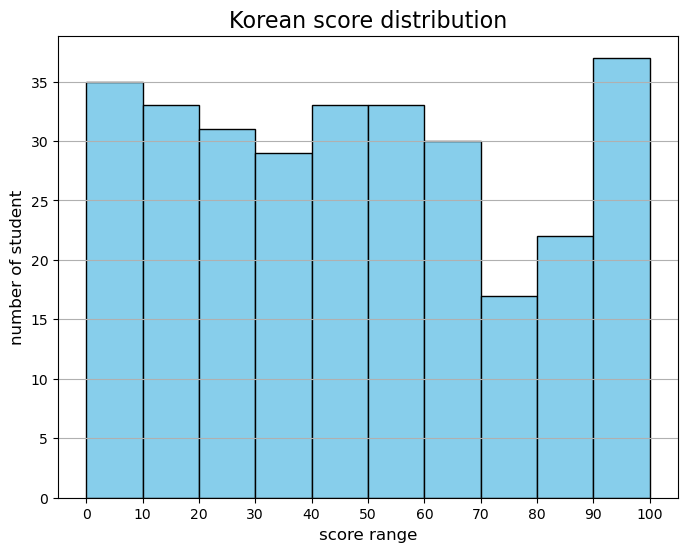

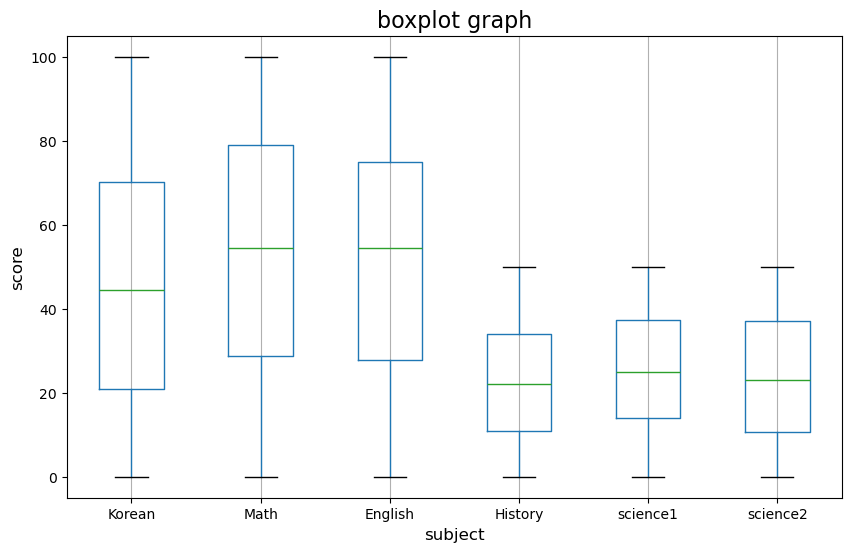

In [17]:
class DrawingScore:
    def __init__(self, data):
        self.data = data
        self.subjects = ['Korean', 'Math', 'English', 'History', 'science1', 'science2']

    def plot_histogram(self, subject): # 히스토그램 함수
        plt.figure(figsize=(8, 6))
        plt.hist(self.data[subject], bins=10, color='skyblue', edgecolor='black')
        
        plt.title(f'{subject} score distribution', fontsize=16)
        plt.xlabel('score range', fontsize=12)
        plt.ylabel('number of student', fontsize=12)
        plt.xticks(range(0, 101, 10))
        
        plt.grid(axis='y')
        plt.show()

    def plot_boxplot(self): # 상자 수염 그림 함수
        plt.figure(figsize=(10, 6))
        self.data[self.subjects].boxplot()
        
        plt.title('boxplot graph', fontsize=16)
        plt.xlabel('subject', fontsize=12)
        plt.ylabel('score', fontsize=12)
        plt.grid(axis='y')
        plt.show()



visualizer = DrawingScore(data)

visualizer.plot_histogram('Korean') # Korean, Math, English, History, science1, science2 6개의 항목이 존재함. 대소문자 주의

visualizer.plot_boxplot()